# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


**Response:**<br><br>
• TikTok wants to build a machine learning model to classify reported videos as either claims or opinions. Claims are more likely to violate terms of service due to its nature of spreading misinformation, and hence are prioritised for human review. <br><br>
• For TikTok's model, false negatives are more important to avoid than false positives. It is better to review extra opinions TikTok videos that were wrongly classified as claims than to risk missing claims TikTok video that could spread misinformation. <br><br>
• Given the need to avoid missing claims, the metric we should focus on is recall.

**Modeling workflow and model selection process**

Previous work with this data has revealed that there are ~20,000 videos in the sample. This is sufficient to conduct a rigorous model validation workflow, broken into the following steps:

1. Split the data into train/validation/test sets (60/20/20)
2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)


### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [89]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

# Import packages for data preprocessing
### YOUR CODE HERE ###
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
### YOUR CODE HERE ###
rows, cols = data.shape
print(f'Number of rows: {rows}')
print(f'Number of cols: {cols}')

Number of rows: 19382
Number of cols: 12


Get the data types of the columns.

In [5]:
# Get data types of columns
### YOUR CODE HERE ###
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
# Drop rows with missing values
### YOUR CODE HERE ###
data.dropna(inplace=True)

In [10]:
# Display first few rows after handling missing values
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
# Check for duplicates
### YOUR CODE HERE ###
data.duplicated().sum()

0

Check class balance.

In [12]:
# Check class balance
### YOUR CODE HERE ###
data['claim_status'].value_counts(normalize=True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [13]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
data['text_length'] = data['video_transcription_text'].apply(lambda x:len(x))
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Calculate the average text_length for claims and opinions.

In [14]:
# Calculate the average text_length for claims and opinions
### YOUR CODE HERE ###
data[['claim_status','video_transcription_text']].groupby(by='claim_status')[['video_transcription_text']].agg(lambda x:np.mean([len(text) for text in x]))

,video_transcription_text
claim_status,
claim,95.376978
opinion,82.722562


Visualize the distribution of `text_length` for claims and opinions.

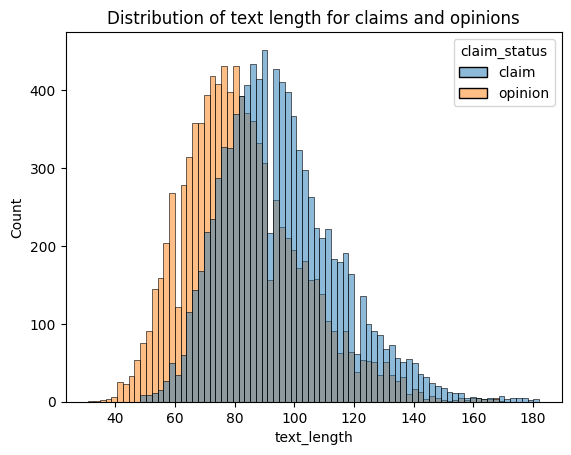

In [15]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
### YOUR CODE HERE ###
# data
# plt.figure(figsize=(11,4))
sns.histplot(data=data,x='text_length',hue='claim_status',alpha=0.5)
plt.title('Distribution of text length for claims and opinions');

**Feature selection and transformation**

Encode target and catgorical variables.

In [16]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [17]:
# Create a copy of the X data
### YOUR CODE HERE ###
X = data.copy()
# Drop unnecessary columns
### YOUR CODE HERE ###
X.drop(['video_id','#'],axis=1,inplace=True)
X.head()
# Encode target variable
### YOUR CODE HERE ###
X['claim_status'] = X['claim_status'].replace({'opinion':0,'claim':1})
# Dummy encode remaining categorical values
### YOUR CODE HERE ###
X = pd.get_dummies(X,columns=['verified_status','author_ban_status'],drop_first=True)
X.head()

,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


### **Task 4: Split the data**

Assign target variable.

In [18]:
# Isolate target variable
### YOUR CODE HERE ###
y = X['claim_status']

Isolate the features.

In [19]:
# Isolate features
### YOUR CODE HERE ###
X.drop(['claim_status'],axis=1,inplace=True)
X.drop(['video_transcription_text'],axis=1,inplace=True)
# Display first few rows of features dataframe
### YOUR CODE HERE ###
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [20]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [21]:
# Split the training data into training and validation sets
### YOUR CODE HERE ###
X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train, test_size=0.25,random_state=0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [22]:
# Get shape of each training, validation, and testing set
### YOUR CODE HERE ###
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((15267, 10), (3817, 10), (3817, 10), (15267,), (3817,), (3817,))

### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [49]:
# Instantiate the random forest classifier
### YOUR CODE HERE ###
from sklearn.metrics import make_scorer
rf = RandomForestClassifier(random_state=0)
# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
cv_params = {'max_depth': [3,4,5], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }  
# Define a list of scoring metrics to capture
### YOUR CODE HERE ###
scoring = ['accuracy', 'precision', 'recall', 'f1']
# Instantiate the GridSearchCV object
### YOUR CODE HERE ###
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [50]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 22min 26s, sys: 2.73 s, total: 22min 29s
Wall time: 22min 29s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, 5], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 125, 150]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [51]:
# Examine best recall score
### YOUR CODE HERE ###
rf_cv.best_score_

0.9904135843303704

In [52]:
# Examine best parameters
### YOUR CODE HERE ###
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 75}

Check the precision score to make sure the model isn't labeling everything as claims. You can do this by using the `cv_results_` attribute of the fit `GridSearchCV` object, which returns a numpy array that can be converted to a pandas dataframe. Then, examine the `mean_test_precision` column of this dataframe at the index containing the results from the best model. This index can be accessed by using the `best_index_` attribute of the fit `GridSearchCV` object.

In [66]:
# Access the GridSearch results and convert it to a pandas df
### YOUR CODE HERE ###
results = pd.DataFrame(rf_cv.cv_results_)
# Examine the GridSearch results df at column `mean_test_precision` in the best index
### YOUR CODE HERE ###
highest_precision = results['mean_test_precision'][rf_cv.best_index_]
highest_precision

0.9998692810457517

**Question:** How well is your model performing? Consider average recall score and precision score.<br>
**Response:**<br>
The model shows promising performance, with a high average recall score of 0.9904 and an even higher precision score of 0.9999. This means that it is very effective at identifying positve cases while making very few false positive errors in the process. 

### **Build an XGBoost model**

In [72]:
# Instantiate the XGBoost classifier
### YOUR CODE HERE ###
xgb = XGBClassifier(objective='binary:logistic',random_state=0)
# Create a dictionary of hyperparameters to tune
### YOUR CODE HERE ###
cv_params = {'max_depth': [3,4,5], 
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 125, 150]
             } 
# Define a list of scoring metrics to capture
### YOUR CODE HERE ###
scoring = ['accuracy', 'precision', 'recall', 'f1']
# Instantiate the GridSearchCV object
### YOUR CODE HERE ###
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5,refit='recall')

In [74]:
%%time
xgb_cv.fit(X_train,y_train)

CPU times: user 3min 12s, sys: 2.46 s, total: 3min 15s
Wall time: 1min 44s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125, 150]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [76]:
# Examine best recall score
### YOUR CODE HERE ###
xgb_cv.best_score_

0.9909318029946373

In [78]:
# Examine best parameters
### YOUR CODE HERE ###
xgb_cv.best_params_

{'learning_rate': 0.2,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 150}

Repeat the steps used for random forest to examine the precision score of the best model identified in the grid search.

In [81]:
# Access the GridSearch results and convert it to a pandas df
### YOUR CODE HERE ###
cv_results = pd.DataFrame(xgb_cv.cv_results_)
# Examine the GridSearch results df at column `mean_test_precision` in the best index
### YOUR CODE HERE ###
highest_precision_score = cv_results['mean_test_precision'][xgb_cv.best_index_]
highest_precision_score

0.9998696219035204

**Question:** How well does your model perform? Consider recall score and precision score. <br>
**Response:**<br>
This model shows promising performance as well, with a higher average recall score of 0.9909 and with a similarly high average precision score of 0.9999. This means that the XGBoost model is also very effective at identifying positve cases while making very few false positive errors in the process.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [109]:
# Use the random forest "best estimator" model to get predictions on the validation set
### YOUR CODE HERE ###
y_pred = rf_cv.best_estimator_.predict(X_val)

Display the predictions on the validation set.

In [110]:
# Display the predictions on the validation set
### YOUR CODE HERE ###
y_pred

array([1, 0, 1, ..., 1, 1, 1])

Display the true labels of the validation set.

In [111]:
# Display the true labels of the validation set
### YOUR CODE HERE ###
y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

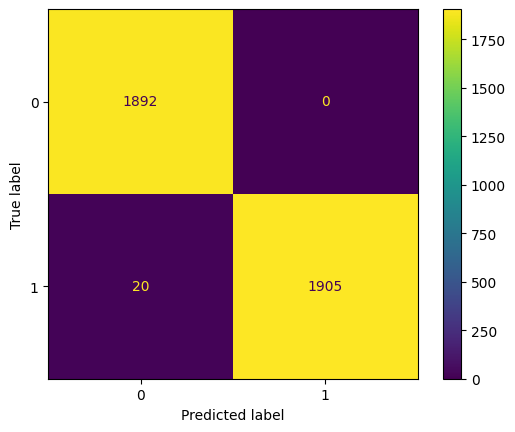

In [127]:
### YOUR CODE HERE ###
cm = metrics.confusion_matrix(y_val,y_pred,labels=rf_cv.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf_cv.classes_)
disp.plot();

# 

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.
<br> </br>

**Note:** In other labs there was a custom-written function to extract the accuracy, precision, recall, and F<sub>1</sub> scores from the GridSearchCV report and display them in a table. You can also use scikit-learn's built-in [`classification_report()`](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) function to obtain a similar table of results.

In [113]:
# Create a classification report
# Create classification report for random forest model
### YOUR CODE HERE ###``
target_labels = ['opinion','claim']
print(classification_report(y_val,y_pred,target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** What does your classification report show? What does the confusion matrix indicate? <br>
**Response:**<br>
The classification report shows that the model achieves a good performance, with precision, recall and f1-scores close to or equal to 1. <br>
The confusion matrix suggests that there is a small (20) number of misclassifications, where TikTok videos predicted to be opinions are actually claims. 

#### **XGBoost**

Now, evaluate the XGBoost model on the validation set.

In [114]:
# Use the best estimator to predict on the validation data
### YOUR CODE HERE ###
xgb_cv_preds = xgb_cv.best_estimator_.predict(X_val)

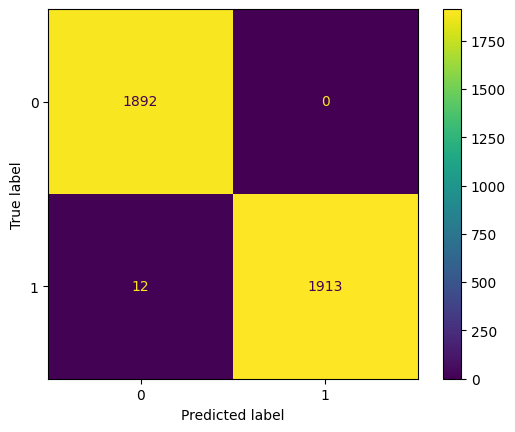

In [117]:
### YOUR CODE HERE ###
cm = metrics.confusion_matrix(y_val, xgb_cv_preds, labels = xgb_cv.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = xgb_cv.classes_)
disp.plot();

In [128]:
# Create a classification report
### YOUR CODE HERE ###
target_labels = ['opinion','claim']
print(classification_report(y_val,xgb_cv_preds,target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1892
       claim       1.00      0.99      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model? <br>
**Response:**<br>
The XGBoost model achieves a perfect score for the f1-score metric, with near perfect or perfect scores for precision and recall metrics. Comparing the confusion matrix of both the random forest model and the XGBoost model, the XGBoost model performs better, with fewer misclassifications. 

### **Use champion model to predict on test data**

In [129]:
### YOUR CODE HERE ###
xgb_cv_pred = xgb_cv.best_estimator_.predict(X_test)

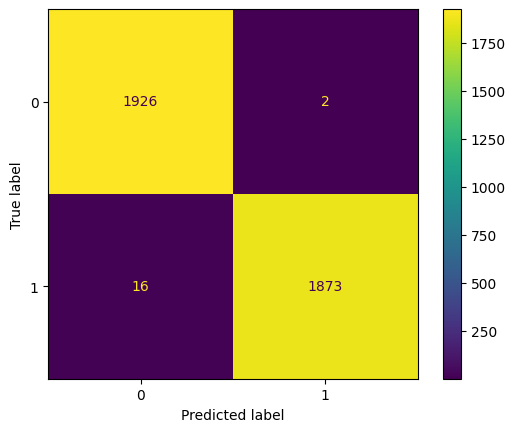

In [130]:
### YOUR CODE HERE ###
cm = metrics.confusion_matrix(y_test, xgb_cv_pred, labels = xgb_cv.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = xgb_cv.classes_)
disp.plot();

#### **Feature importances of champion model**


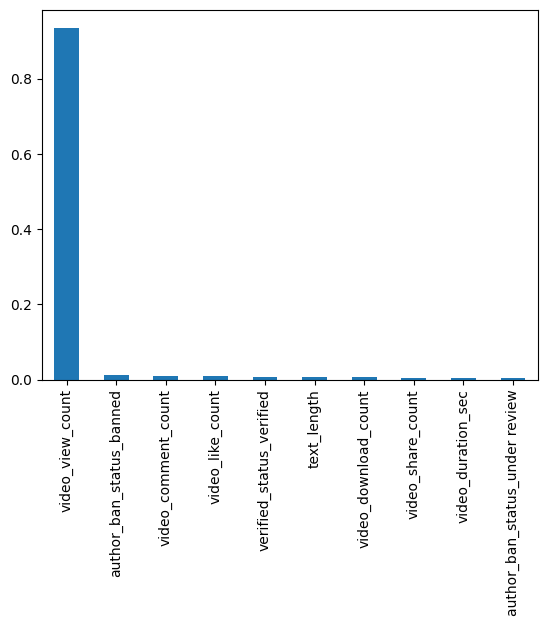

In [133]:
### YOUR CODE HERE ###
importances = xgb_cv.best_estimator_.feature_importances_
importances_table = pd.Series(importances,index=X_test.columns).sort_values(ascending=False)
importances_table.plot.barh();

**Question:** Describe your most predictive features. Were your results surprising? <br>
**Response:**<br>
The most predictive feature in the model is video_view_count, which stands out with a much higher importance score than any other feature. Other features appear to have negligible importance scores. This indicates that the number of views a video receives is the primary driver for the model's prediction of whether a TikTok video falls under a claim or an opinion.
<br>
This result is surprising, as our previous lab on exploratory data analysis showed that features like video_view_count and video_like_count are strongly correlated. Intuitively, we might expect both features to contribute significantly to the model's predictive power, but this is not the case.

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance? <br>What features would you want to have that would likely improve the performance of your model?**


Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


**Response:**<br>
1) Given the model's strong performance in producing near-perfect precision, recall, and F1 score, the model is well-suited for recommendation. <br>
2) The model was trained to classify TikTok videos as claims or opinions using features such as view count and comment count. From the graph, we can see that the model heavily utilises the view count in determining whether or not a TikTok video would be classified as a claim, with negligible focus on other features. <br>
3) New features that might improve the model's performance could include sentiment analysis. Perhaps certain keywords in the video transcription text could better help us identify TikTok videos that are opinions, as these videos may contain more expressive language.<br>
